## FAKE NEWS CLASSIFICATION

## Exploratory Data Analysis(EDA) :

EDA (Exploratory Data Analysis) is the process of visually and statistically examining a dataset to understand its structure, detect patterns, and gain insights that guide further analysis and decision-making.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df= pd.read_csv('files/train/raw/train.csv')

In [3]:
df

,id,title,author,text,label
0,3777,Four-Day Obama Trip in 2013 Cost US Taxpayers ...,NaN,Get short URL 0 4 0 0 President Barack Obama’s...,1
1,15265,A Hillary Clinton indictment is coming,Michael Snyder,VIDEOS A Hillary Clinton indictment is coming ...,1
2,16615,Snake in a suit: International prosecutor char...,NaN,"Radio Free Europe Tue, 25 Oct 2016 20:50 UTC A...",1
3,5111,Inviting the Easter Bunny to the Seder - The N...,Yotam Ottolenghi,I went on my first Easter egg hunt a couple of...,0
4,495,Contaminated Food from China Now Entering the ...,noreply@blogger.com (Alexander Light),Contaminated Food from China Now Entering the ...,1
...,...,...,...,...,...
14554,7763,Four Movies You Should Know About Before the G...,Wesley Morris and Jenna Wortham,"Last month, about 50 new movies opened in New ...",0
14555,15377,Terrorists attack police training college in P...,NaN,(7 fans) - Advertisement - At lease 60 cadets ...,1
14556,17730,Presidential Debate: Here’s What You Missed - ...,Alex Burns and Matt Flegenheimer,We analyzed in real time the second presidenti...,0
14557,15725,The Tragically Hip’s Gord Downie: A True Canad...,Alanna Ketler,For those of you who have no clue who Gord Dow...,1


## Data Preprocessing

Data preprocessing is the preparatory step in data analysis that involves cleaning, transforming, and organizing raw data to ensure it is in a suitable format for analysis and modeling.

In [4]:
#To display the first 10 rows
df.head(10)

,id,title,author,text,label
0,3777,Four-Day Obama Trip in 2013 Cost US Taxpayers ...,NaN,Get short URL 0 4 0 0 President Barack Obama’s...,1
1,15265,A Hillary Clinton indictment is coming,Michael Snyder,VIDEOS A Hillary Clinton indictment is coming ...,1
2,16615,Snake in a suit: International prosecutor char...,NaN,"Radio Free Europe Tue, 25 Oct 2016 20:50 UTC A...",1
3,5111,Inviting the Easter Bunny to the Seder - The N...,Yotam Ottolenghi,I went on my first Easter egg hunt a couple of...,0
4,495,Contaminated Food from China Now Entering the ...,noreply@blogger.com (Alexander Light),Contaminated Food from China Now Entering the ...,1
5,4055,"As The World Awaits The U.S. Election Outcome,...",King World News,"10 Views November 07, 2016 GOLD , KWN King Wor...",1
6,1273,"Boaty McBoatface, From Internet Joke to Polar ...",Hannah Olivennes,"LONDON — Boaty McBoatface is back, but this...",0
7,17216,Test: ¿Qué tipo de vecino eres?,Redacción,vivienda \nLas comunidades de vecinos son un h...,1
8,14119,BOMSBHELL: The Clintons’ Fixer PROVES That Hil...,admin,Ads BOMSBHELL: The Clintons’ Fixer PROVES That...,1
9,2950,"N.C.A.A. Tournament Reality: The Haves Get In,...",Marc Tracy,BUFFALO — Fans grumbled loudly last March w...,0


In [5]:
#To display the last 10 rows
df.tail(10)

,id,title,author,text,label
14549,5664,Biden Blames “Lazy American Women” For The Eco...,NaN,Email \n\nDemocratic Vice President Joe Biden ...,1
14550,20553,As Anthem-Protesting Colin Kaepernick’s Free A...,Warner Todd Huston,After spending half the season perpetrating an...,0
14551,20527,"How Apple Empowers, and Employs, the American ...",Vindu Goel,"AUSTIN, Tex. — During the presidential camp...",0
14552,96,The Geometry of Energy and Meditation of Buddha,NaN,License DMCA \nA mandala is a visual symbol of...,1
14553,13435,Assaults on Border Patrol Agents Continue – 3 ...,Bob Price,Three U. S. Border Patrol agents assigned to t...,0
14554,7763,Four Movies You Should Know About Before the G...,Wesley Morris and Jenna Wortham,"Last month, about 50 new movies opened in New ...",0
14555,15377,Terrorists attack police training college in P...,NaN,(7 fans) - Advertisement - At lease 60 cadets ...,1
14556,17730,Presidential Debate: Here’s What You Missed - ...,Alex Burns and Matt Flegenheimer,We analyzed in real time the second presidenti...,0
14557,15725,The Tragically Hip’s Gord Downie: A True Canad...,Alanna Ketler,For those of you who have no clue who Gord Dow...,1
14558,19966,The Other October Surprise—An Eruption In The ...,David Stockman,The Other October Surprise---An Eruption In Th...,1


In [6]:
#To see the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14559 entries, 0 to 14558
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      14559 non-null  int64 
 1   title   14162 non-null  object
 2   author  13184 non-null  object
 3   text    14530 non-null  object
 4   label   14559 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 568.8+ KB


In [7]:
df.shape

(14559, 5)

In [8]:
#To check if there is any null value
df.isnull().sum()

id           0
title      397
author    1375
text        29
label        0
dtype: int64

In [9]:
#To check if there is any nan value
df.isna().sum()

id           0
title      397
author    1375
text        29
label        0
dtype: int64

In [10]:
#To check the unique values
df.duplicated().sum()

0

In [11]:
df.describe(include="all")

,id,title,author,text,label
count,14559.000000,14162,13184,14530,14559.000000
unique,NaN,13919,3360,14282,NaN
top,NaN,Thomas Frank Explores Whether Hillary Clinton ...,Pam Key,,NaN
freq,NaN,4,163,57,NaN
mean,10371.066282,NaN,NaN,NaN,0.503194
std,6009.437248,NaN,NaN,NaN,0.500007
min,0.000000,NaN,NaN,NaN,0.000000
25%,5151.500000,NaN,NaN,NaN,0.000000
50%,10351.000000,NaN,NaN,NaN,1.000000
75%,15572.500000,NaN,NaN,NaN,1.000000


## Outliers Finding

Outlier finding is the process of identifying data points in a dataset that significantly deviate from the rest of the data, potentially indicating errors or unusual observations that could impact the analysis and should be further investigated or handled.

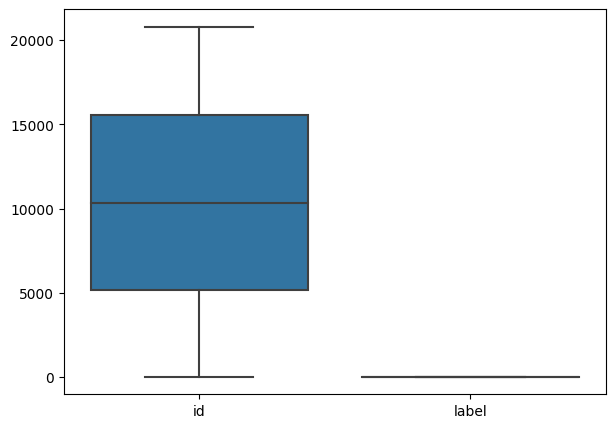

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(df)
plt.show()

In [13]:
# Target and labels

x=df.drop('label',axis=1).copy()
y=df['label'].copy()

In [14]:
x

,id,title,author,text
0,3777,Four-Day Obama Trip in 2013 Cost US Taxpayers ...,NaN,Get short URL 0 4 0 0 President Barack Obama’s...
1,15265,A Hillary Clinton indictment is coming,Michael Snyder,VIDEOS A Hillary Clinton indictment is coming ...
2,16615,Snake in a suit: International prosecutor char...,NaN,"Radio Free Europe Tue, 25 Oct 2016 20:50 UTC A..."
3,5111,Inviting the Easter Bunny to the Seder - The N...,Yotam Ottolenghi,I went on my first Easter egg hunt a couple of...
4,495,Contaminated Food from China Now Entering the ...,noreply@blogger.com (Alexander Light),Contaminated Food from China Now Entering the ...
...,...,...,...,...
14554,7763,Four Movies You Should Know About Before the G...,Wesley Morris and Jenna Wortham,"Last month, about 50 new movies opened in New ..."
14555,15377,Terrorists attack police training college in P...,NaN,(7 fans) - Advertisement - At lease 60 cadets ...
14556,17730,Presidential Debate: Here’s What You Missed - ...,Alex Burns and Matt Flegenheimer,We analyzed in real time the second presidenti...
14557,15725,The Tragically Hip’s Gord Downie: A True Canad...,Alanna Ketler,For those of you who have no clue who Gord Dow...


In [15]:
y

0        1
1        1
2        1
3        0
4        1
        ..
14554    0
14555    1
14556    0
14557    1
14558    1
Name: label, Length: 14559, dtype: int64

In [16]:
encoder=OrdinalEncoder()
x_encode=encoder.fit(x)
import joblib as jb
jb.dump(x_encode,'files/train/processed/x_encode_model.pkl')
x_encode=encoder.transform(x)
x_encode=pd.DataFrame(x_encode,columns=x.columns)
x_encode

,id,title,author,text
0,2673.0,4490.0,NaN,4944.0
1,10709.0,427.0,2142.0,12151.0
2,11640.0,10113.0,NaN,9313.0
3,3613.0,5984.0,3125.0,5727.0
4,340.0,2844.0,3262.0,3516.0
...,...,...,...,...
14554,5477.0,4487.0,3086.0,6724.0
14555,10786.0,10661.0,NaN,672.0
14556,12414.0,8799.0,114.0,13021.0
14557,11018.0,11131.0,110.0,4661.0


OrdinalEncoder is a method used to convert categorical data into numerical values, where the order of the categories is preserved but without implying any specific numerical relationships between them.

In [17]:
encoder=LabelEncoder()
y_encode=encoder.fit(y)
import joblib as jb
jb.dump(y_encode,'files/train/processed/y_encode_model.pkl')
y_encode=encoder.transform(y)
y_encode=pd.DataFrame(y)
y_encode

,label
0,1
1,1
2,1
3,0
4,1
...,...
14554,0
14555,1
14556,0
14557,1


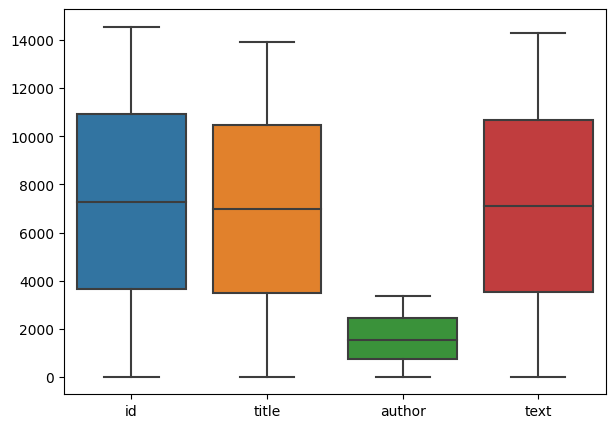

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(x_encode)
plt.show()

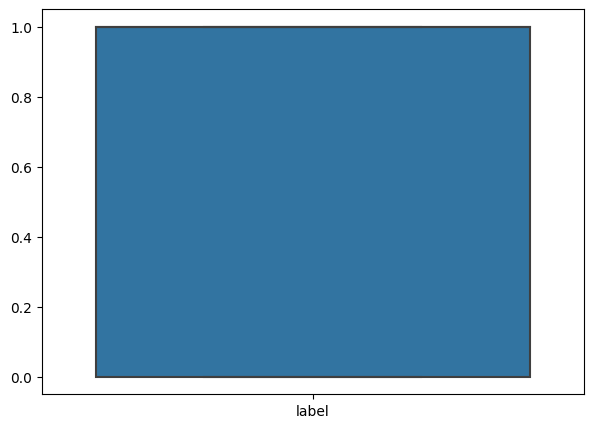

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(y_encode)
plt.show()

1    7326
0    7233
Name: label, dtype: int64


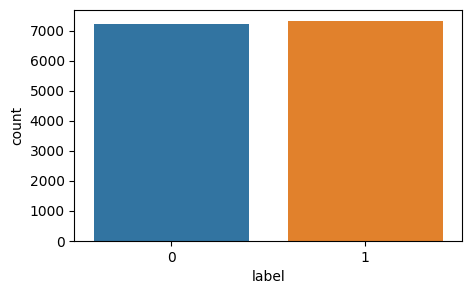

In [20]:
# count the label
print(y_encode["label"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x="label",data=y_encode)
plt.show()